In [47]:
import pandas as pd
from konlpy.tag import Kkma
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [5]:
df = pd.read_csv('result/잼페이스.csv')

In [8]:
kkma = Kkma()

In [10]:
df

,name,ratings,date,helpful,comment,developer_comment
0,Seohyeon Kim,5,2020-04-25,22,정말 오랫동안 잼페이스를 사용해온 유접니다 일단 자신의 얼굴의 따라 메이크업을할수있...,NaN
1,차승민,1,2020-04-30,10,리뷰가 없어져서 다시쓰네요 제가 젬페이스로 뷰튜버들 화장영상 보면서 따라하고 타임점...,NaN
2,박소민,3,2020-05-01,9,"저 진짜 안좋은 말만 안하고싶은데ㅠㅠ 하나만 말할게요,,,어제 타임점프이벤트가 끝났...",ZAMFACE2020년 5월 5일소민님!! 타임점프 100% 달성하셨나요? +_+...
3,su jin kim,5,2020-05-05,0,굳이 유튭에서 스킵 안눌러도 되는게 좋아여. 바로바로 메이크업 단계별로 넘어갈 수 ...,"ZAMFACE2020년 5월 6일su jin kim 님, 감사합니다😊 ! 앞으로도 ..."
4,유자 「#자몽이들사랑해요」,5,2020-04-28,1,화장하는 영상과 화장품까지 자세히 모아나서 괭장히 화장에 도움이됀다 초보자매이크업을...,NaN
...,...,...,...,...,...,...
195,임예진,5,2020-01-13,0,저는 광고로 앱을 다운 받았는데 뷰티에 관심이 많은신 분들이라면 추천하고싶어요!😄 ...,NaN
196,고경녕,5,2020-02-06,0,이 앱으로 저에게 맞는 여러가지 화장방법과 화장품을 볼수 있으니 완전 좋아요!,NaN
197,으능,5,2019-12-05,1,정말 이벤트도 다양하고 무엇보다 영상에 쓰인 제품이 자세하게 표시되어있는게 너무 좋...,NaN
198,허지윤,5,2020-02-12,0,뷰티 관련 지식을 업그레이드 해주는데 최적화된 앱,NaN


In [12]:
#sentences 문장 nouns 명사 pos 형태소 분석 태깅
[kkma.sentences(comment) for comment in df['comment']]

[['정말 오랫동안 잼 페이스를 사용해 온 유 접니다',
  '일단 자신의 얼굴의 따라 메이크업을 할 수 있어 정말 좋고 사고 싶었던 뷰티 제품이나 내가 갖고 있는 제품으로 한 메이크업을 볼 수 있어 정말 좋은 것 같아요',
  ':) 이벤트도 정말 많구요'],
 ['리뷰가 없어 져서 다시 쓰네요',
  '제가 젬 페이스로 뷰 튜 버들 화장 영상 보면서 따라하고 타임 점프도 유용해서 즐겨 쓰고 했던 앱인데 스탬프 방 이벤트 응모하려고 친구들한테 젬 페이스 소개시켜 준다고 제가 얼굴 매칭도 신기 하다고 알려주고 그랬습니다',
  '근데 저희가 한 친구가 오류인지 잘 안돼서 이벤트 실패했는데 다음에 또 시도 해봤는데 이벤트에 참여를 처음하는 유저들 만 할 수 있게 되어 있더라구요',
  '4명 다 채우지 못했는데 이벤트에 시간이 지나고 이벤트에 참여 할 수 있는 기회를 주시던가 아니면 성공을 했을 때 더 이상 참여 못하는 방식으로 바꿔 주시면 안될까요 친구들과 제가 많이 상심했네요',
  'ㅜ'],
 ['저 진짜 안 좋은 말만 안하고 싶은데 ㅠㅠ 하나만 말할게요,,,',
  '어제 타임 점프 이벤트가 끝났는데 20까지 다 찍으면 올 영 1만 원권 아닌가요?? 당첨된 제품은 알림 안 뜨면 당첨 안된 거 여서 그렇지만 20까지 찍었는데 그 올 영 1만 원권은 알림이 오나요?? 연락처나 주소 같은 거 안 찍으면 당첨 되거나 그래도 알림 안 뜬다 해서 다 수정했는데 올 영 1만 원권 알림이 안 떴어요',
  '이것도 혹시 당첨해서 뽑는 이벤트인가요,,,?'],
 ['굳이 유튭에서 스킵 안 눌러도 되는 게 좋아 여. 바로 바로 메이크업 단계별로 넘어갈 수 있응 까 급하게 살 거 있을 때 시간 절약할 수 있어 여.'],
 ['화장하는 영상과 화장품까지 자세히 모아 나서 괭 장히 화장에 도움이 됀다 초보자 매이 크업을 원하면 바로 나오는 것이 좋다.'],
 ['자기 자신과 닮은 뷰튜버를 보여주는 것도 좋지만 타임 점프 기능이 정말 좋은 것 같아요', ':)'],
 ['와...

In [38]:
nouns = [kkma.sentences(comment) for comment in df['comment']]

In [39]:
words = []
for n in nouns:
    if len(n) > 1:
        words.append(n)
print(words)

[['정말 오랫동안 잼 페이스를 사용해 온 유 접니다', '일단 자신의 얼굴의 따라 메이크업을 할 수 있어 정말 좋고 사고 싶었던 뷰티 제품이나 내가 갖고 있는 제품으로 한 메이크업을 볼 수 있어 정말 좋은 것 같아요', ':) 이벤트도 정말 많구요'], ['리뷰가 없어 져서 다시 쓰네요', '제가 젬 페이스로 뷰 튜 버들 화장 영상 보면서 따라하고 타임 점프도 유용해서 즐겨 쓰고 했던 앱인데 스탬프 방 이벤트 응모하려고 친구들한테 젬 페이스 소개시켜 준다고 제가 얼굴 매칭도 신기 하다고 알려주고 그랬습니다', '근데 저희가 한 친구가 오류인지 잘 안돼서 이벤트 실패했는데 다음에 또 시도 해봤는데 이벤트에 참여를 처음하는 유저들 만 할 수 있게 되어 있더라구요', '4명 다 채우지 못했는데 이벤트에 시간이 지나고 이벤트에 참여 할 수 있는 기회를 주시던가 아니면 성공을 했을 때 더 이상 참여 못하는 방식으로 바꿔 주시면 안될까요 친구들과 제가 많이 상심했네요', 'ㅜ'], ['저 진짜 안 좋은 말만 안하고 싶은데 ㅠㅠ 하나만 말할게요,,,', '어제 타임 점프 이벤트가 끝났는데 20까지 다 찍으면 올 영 1만 원권 아닌가요?? 당첨된 제품은 알림 안 뜨면 당첨 안된 거 여서 그렇지만 20까지 찍었는데 그 올 영 1만 원권은 알림이 오나요?? 연락처나 주소 같은 거 안 찍으면 당첨 되거나 그래도 알림 안 뜬다 해서 다 수정했는데 올 영 1만 원권 알림이 안 떴어요', '이것도 혹시 당첨해서 뽑는 이벤트인가요,,,?'], ['자기 자신과 닮은 뷰튜버를 보여주는 것도 좋지만 타임 점프 기능이 정말 좋은 것 같아요', ':)'], ['와... 말도 안돼 이런앱을 지금 쓰다니...', 'ㅠㅠㅠㅠㅠㅠ 예전부터 썻으면 정말 좋았을 텐데 ㅠㅠ 정말 아쉬운 점 하나 없고 너무 좋아 여! 강추 강추!!'], ['간혹 앱을 쓰다 보면 시청하려는 영상이 반복적으로 일시정지 현상이 일어납니다.', '창을 내리고 다시 접속해 영상을 재생하면 또 같은 일이 발생합니다.', '일시정지 버

In [40]:
count = [Counter(word) for word in words]

In [41]:
most = [count.most_common(100) for count in count]
tags = {}
for n in most:
    for j,v in n:
        tags[j] = v

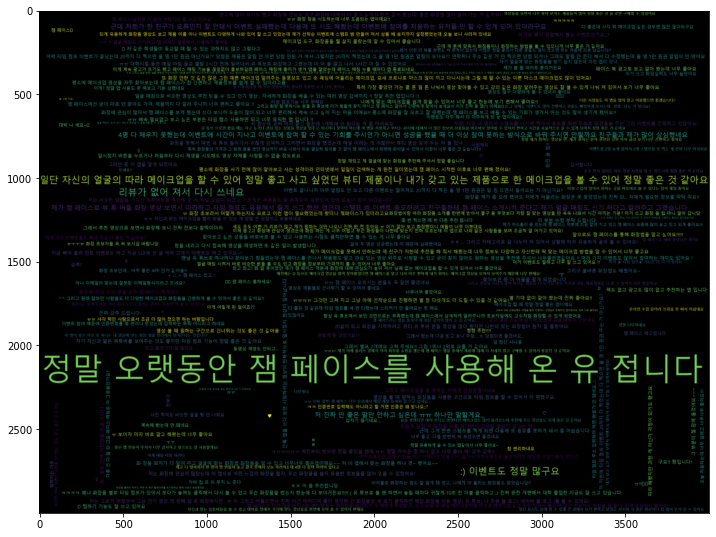

In [50]:
wc = WordCloud(font_path = 'C:\Windows\Fonts\malgun.ttf',width=2000,height=1500,
              scale=2.0, max_font_size=250)

gen = wc.generate_from_frequencies(tags)
plt.figure(figsize=(12,10))
plt.imshow(gen, interpolation = 'bilinear')
wc.to_file("잼.png")
plt.show()